# Building a song recommender

In [12]:
%matplotlib inline

import pandas
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
import Recommenders as Recommenders
import Evaluation as Evaluation

# Load music data

In [13]:
triplets_file = 'https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

song_df_1 = pandas.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

#Read songs  metadata
song_df_2 =  pandas.read_csv(songs_metadata_file)

#Merge the two dataframes above to create input dataframe for recommender systems
song_df = pandas.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left") 

In [14]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [15]:
len(song_df)

2000000

## Create a subset of the dataset

In [16]:
song_df = song_df.head(10000)

#Merge song title and artist_name columns to make a merged column
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

### Top popular songs based on listen count
##### The issue with data is that there isn't a high song count so whenever we perform a popularity model or a filtering method our suggestions are going to be off a bit. To improve this we would data that has more accurate listen_counts so we can filter out what the user is/isn't listening to

In [17]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage']  = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending = [0,1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


## number of unique users in the dataset

In [18]:
users = song_df['user_id'].unique()

##### This was another issue we had. We only have 365 unique users in this dataset & while that does seem like a good enough amount, it isn't. There are artists from so many different genres/eras & when you end up splitting them up and putting them into their own container 365 quickly drops to a much smaller number

In [19]:
len(users)

365

## Number of unique songs

In [20]:
###Fill in the code here
songs = song_df['song'].unique()
len(songs)

5151

# Create a song recommender

In [21]:
train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

### Create an instance of popularity based recommender class

In [63]:
pm = Recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

In [55]:
for i in range(15):
    print("user id: ", users[i], " song: ", songs[i])

user id:  b80344d063b5ccb3212f76538f3d9e43d87dca9e  song:  The Cove - Jack Johnson
user id:  85c1f87fea955d09b4bec2e36aee110927aedf9a  song:  Entre Dos Aguas - Paco De Lucia
user id:  bd4c6e843f00bd476847fb75c47b4fb430a06856  song:  Stronger - Kanye West
user id:  8937134734f869debcab8f23d77465b4caaa85df  song:  Constellations - Jack Johnson
user id:  969cc6fb74e076a68e36a04409cb9d3765757508  song:  Learn To Fly - Foo Fighters
user id:  4bd88bfb25263a75bbdd467e74018f4ae570e5df  song:  Apuesta Por El Rock 'N' Roll - Héroes del Silencio
user id:  e006b1a48f466bf59feefed32bec6494495a4436  song:  Paper Gangsta - Lady GaGa
user id:  9d6f0ead607ac2a6c2460e4d14fb439a146b7dec  song:  Stacked Actors - Foo Fighters
user id:  9bb911319fbc04f01755814cb5edb21df3d1a336  song:  Sehr kosmisch - Harmonia
user id:  b64cdd1a0bd907e5e00b39e345194768e330d652  song:  Heaven's gonna burn your eyes - Thievery Corporation feat. Emiliana Torrini
user id:  17aa9f6dbdf753831da8f38c71b66b64373de613  song:  Let It 

### Make predictions given a unique user

In [64]:
user_id = users[6]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,e006b1a48f466bf59feefed32bec6494495a4436,Sehr kosmisch - Harmonia,37,1.0
4083,e006b1a48f466bf59feefed32bec6494495a4436,Undo - Björk,27,2.0
931,e006b1a48f466bf59feefed32bec6494495a4436,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,e006b1a48f466bf59feefed32bec6494495a4436,You're The One - Dwight Yoakam,24,4.0
3034,e006b1a48f466bf59feefed32bec6494495a4436,Revelry - Kings Of Leon,21,5.0
3189,e006b1a48f466bf59feefed32bec6494495a4436,Secrets - OneRepublic,21,6.0
4112,e006b1a48f466bf59feefed32bec6494495a4436,Use Somebody - Kings Of Leon,21,7.0
1207,e006b1a48f466bf59feefed32bec6494495a4436,Fireflies - Charttraxx Karaoke,20,8.0
1577,e006b1a48f466bf59feefed32bec6494495a4436,Hey_ Soul Sister - Train,19,9.0
1626,e006b1a48f466bf59feefed32bec6494495a4436,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


## Method 2: Build a song recommender with a more personalized dataset

We now create an item similarity based collaborative filtering model that allows us to make personalized recommendations to each user. 

### Create an instance of item similarity based recommender class

In [42]:
model = Recommenders.item_similarity_recommender_py()
model.create(train_data, 'user_id', 'song')

### Use the personalized model to make some song recommendations

In [43]:
#Print the songs for the user in training data
user_id = users[5]
user_items = model.get_user_items(user_id)

print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
model.recommend(user_id)

------------------------------------------------------------------------------------
Training data songs for the user userid: 4bd88bfb25263a75bbdd467e74018f4ae570e5df:
------------------------------------------------------------------------------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 13
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Superman - Eminem / Dina Rae,0.088692,1
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Mockingbird - Eminem,0.067663,2
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm Back - Eminem,0.065385,3
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,U Smile - Justin Bieber,0.064525,4
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Here Without You - 3 Doors Down,0.062293,5
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hellbound - J-Black & Masta Ace,0.055769,6
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7
7,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm The One Who Understands (Edit Version) - War,0.052564,8
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Falling - Iration,0.052564,9
9,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10


### Use personalized model to make recommendations for the following user id

In [44]:
user_id = users[7]
#Fill in the code here
user_items = model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data songs for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
model.recommend(user_id)


------------------------------------------------------------------------------------
Training data songs for the user userid: 9d6f0ead607ac2a6c2460e4d14fb439a146b7dec:
------------------------------------------------------------------------------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique songs for the user: 8
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,She Just Likes To Fight - Four Tet,0.281579,1
1,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Warning Sign - Coldplay,0.281579,2
2,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,We Never Change - Coldplay,0.281579,3
3,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Puppetmad - Puppetmastaz,0.281579,4
4,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,God Put A Smile Upon Your Face - Coldplay,0.281579,5
5,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Susie Q - Creedence Clearwater Revival,0.281579,6
6,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,The Joker - Fatboy Slim,0.281579,7
7,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Korg Rhythm Afro - Holy Fuck,0.281579,8
8,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,This Unfolds - Four Tet,0.281579,9
9,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,high fives - Four Tet,0.281579,10


### We can also apply the model to find similar songs to any song in the dataset

In [70]:
model.get_similar_items(["Marry Me - Train"])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :352


,user_id,song,score,rank
0,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.320000,1
1,,Somebody To Love - Justin Bieber,0.291667,2
2,,Hey_ Soul Sister - Train,0.285714,3
3,,Fireflies - Charttraxx Karaoke,0.275862,4
4,,Heartbreak Warfare - John Mayer,0.250000,5
5,,Drop The World - Lil Wayne / Eminem,0.240000,6
6,,Use Somebody - Kings Of Leon,0.225806,7
7,,Just Dance - Lady GaGa / Colby O'Donis,0.222222,8
8,,If I Had You - Adam Lambert,0.210526,9
9,,U Smile - Justin Bieber,0.210526,10


In [66]:
song = 'Somebody To Love - Justin Bieber'
model.get_similar_items([song])

no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :453


,user_id,song,score,rank
0,,U Smile - Justin Bieber,0.428571,1
1,,Lucky (Album Version) - Jason Mraz & Colbie Ca...,0.304348,2
2,,Heartbreak Warfare - John Mayer,0.294118,3
3,,Marry Me - Train,0.291667,4
4,,Party In The U.S.A. - Miley Cyrus,0.285714,5
5,,Pursuit Of Happiness (nightmare) - Kid Cudi / ...,0.277778,6
6,,Eenie Meenie - Sean Kingston and Justin Bieber,0.266667,7
7,,Already Gone - Kelly Clarkson,0.250000,8
8,,Bleed It Out [Live At Milton Keynes] - Linkin ...,0.250000,9
9,,Monster - Lady GaGa,0.235294,10


Now we can use precision score to calculate our well our model is performing

In [33]:
start = time.time()

#Define what percentage of users to use for precision recall calculation
user_sample = 0.05

#Instantiate the precision_recall_calculator class
pr = Evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)

end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:95b2ebf54cd69d732fa433ee8994be5818793efb
No. of unique songs for the user: 12
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :646
Getting recommendations for user:179b2286bb4eea7193bcfa0c36fcfa4eade2b34d
No. of unique songs for the user: 10
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3795
Getting recommendations for user:2c218a60b3d777e9e12d56c2e065a9644b5e5f41
No. of unique songs for the user: 2
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :83
Getting recommendations for user:401c2c49a7c19456212222302a958d715fbcc3ba
No. of unique songs for the user: 1
no. of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :1
Getting recommendations for user:884209a41deb55df792f074bccf8af1c1c31768b
No. of unique songs for the user: 155
no. of unique songs in the tra

## plot precision recall curve

In [34]:
import pylab as pl

#Method to generate precision and recall curve
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()    
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall curve')
    #pl.legend(loc="upper right")
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()


Plotting precision recall curves.


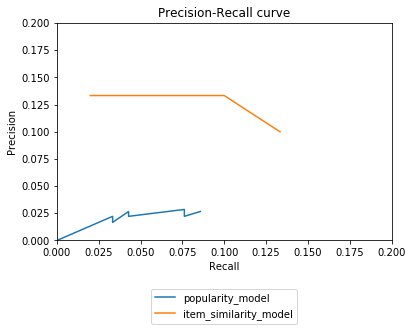

In [35]:
print("Plotting precision recall curves.")

plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model",
                      ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")
